In [1]:
# (1)데이터 가져오기
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
diabetes=load_diabetes()
df_X=pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_y=pd.DataFrame(diabetes.target, columns=['target'])
print(df_X.shape)
print(df_y.shape)
# print(type(df_X))
# print(type(df_y))

(442, 10)
(442, 1)


In [2]:
# (2) 모델에 입력할 데이터 X 준비하기
X = df_X.values

In [3]:
# (3) 모델에 예측할 데이터 y 준비하기
Y = df_y['target'].values

In [4]:
# (4) train 데이터와 test 데이터로 분리하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [5]:
# (5) 모델 준비하기
W = np.random.rand(10)
b = np.random.rand()
# 모델함수
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [6]:
# (6) 손실함수 loss 정의하기
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [7]:
# (7) 기울기를 구하는 gradient 함수 구현하기
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [8]:
# (8) 하이퍼 파라미터인 학습률 설정하기
LEARNING_RATE = 0.005

In [9]:
# (9) 모델 학습하기
losses = []

for i in range(1, 80001):#이 경우 반복을 늘리면 성능이 더 안좋아졌다
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 20000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        prediction = model(X_test, W, b)
        mse = loss(X_test, W, b, y_test)
        print('test mse : ' + str(mse))

Iteration 20000 : Loss 3384.4114
test mse : 3298.1960463104515
Iteration 40000 : Loss 3046.0257
test mse : 3092.04342569945
Iteration 60000 : Loss 2931.7129
test mse : 3033.011977962766
Iteration 80000 : Loss 2885.1234
test mse : 3018.7572064747387


In [10]:
# (10) test 데이터에 대한 성능 확인하기
import matplotlib.pyplot as plt
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse


3018.7572064747387

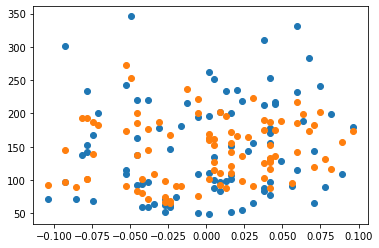

In [11]:
# (11) 정답 데이터와 예측한 데이터 시각화하기
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

In [12]:
# 필요없는 칼럼 확인
pd.concat([df_X,df_y],axis=1).corr()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


In [13]:
# print(df_X.drop(labels='sex',axis=1))
X = df_X.drop(labels=['sex','s2'],axis=1).values   #필요없는 sex 칼럼 삭제 및 X 재지정
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)   #학습/테스트셋 다시 만들기

# 가중치 및 모델함수 재지정
W = np.random.rand(8)
b = np.random.rand()
# 모델함수
def model(X, W, b):
    predictions = 0
    for i in range(8):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [14]:
losses = []
# 재학습
LEARNING_RATE=0.02
for i in range(1, 1000001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 20000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        prediction = model(X_test, W, b)
        mse = loss(X_test, W, b, y_test)
        print('test mse : ' + str(mse))


Iteration 20000 : Loss 3033.1748
test mse : 3067.830157153494
Iteration 40000 : Loss 2980.9447
test mse : 3027.5374988227254
Iteration 60000 : Loss 2972.9581
test mse : 3016.9470253576505
Iteration 80000 : Loss 2971.2713
test mse : 3011.6712546825506
Iteration 100000 : Loss 2970.8394
test mse : 3008.5583540965354
Iteration 120000 : Loss 2970.7006
test mse : 3006.6357487042415
Iteration 140000 : Loss 2970.6387
test mse : 3005.3947595551726
Iteration 160000 : Loss 2970.6006
test mse : 3004.5436627409285
Iteration 180000 : Loss 2970.5726
test mse : 3003.918336573805
Iteration 200000 : Loss 2970.5504
test mse : 3003.4285306155884
Iteration 220000 : Loss 2970.5324
test mse : 3003.025007690023
Iteration 240000 : Loss 2970.5177
test mse : 3002.6806296665172
Iteration 260000 : Loss 2970.5056
test mse : 3002.379978139782
Iteration 280000 : Loss 2970.4957
test mse : 3002.1138299981308
Iteration 300000 : Loss 2970.4876
test mse : 3001.8762686279442
Iteration 320000 : Loss 2970.4810
test mse : 300

In [15]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2999.7371909142134

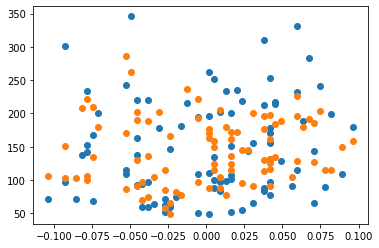

In [16]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()